In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
sns.set_context('notebook')

RANDOM_SEED = 20090425
from scipy.stats import norm,gamma,chi2, expon, uniform, t

from scipy.special import expit

In [5]:
df = pd.read_csv('data/annual-carbon-dioxide-emissions.csv')

df['Annual_CO2_Emissions']= df['Annual_CO2_Emissions'].div(10**6)
df

,Entity,Code,Year,Annual_CO2_Emissions
0,Afghanistan,AFG,2003,0.658754
1,Afghanistan,AFG,2004,0.433206
2,Afghanistan,AFG,2005,0.310266
3,Afghanistan,AFG,2006,0.469605
4,Afghanistan,AFG,2007,0.546588
...,...,...,...,...
5671,Zimbabwe,ZWE,2020,7.861682
5672,Zimbabwe,ZWE,2021,20.230054
5673,Zimbabwe,ZWE,2022,28.025788
5674,Zimbabwe,ZWE,2023,27.818398


In [7]:
code = 'India'  # Replace 'AFG' with the code you want to filter by
filtered_df = df[df['Entity'] == code]
print(filtered_df)

     Entity Code  Year  Annual_CO2_Emissions
2354  India  IND  2003             79.619300
2355  India  IND  2004             83.115340
2356  India  IND  2005             80.994260
2357  India  IND  2006             83.202216
2358  India  IND  2007             72.944420
2359  India  IND  2008             63.249172
2360  India  IND  2009             88.624190
2361  India  IND  2010             72.259540
2362  India  IND  2011             60.604588
2363  India  IND  2012             73.798616
2364  India  IND  2013             57.648076
2365  India  IND  2014             64.428360
2366  India  IND  2015             63.010204
2367  India  IND  2016             96.181784
2368  India  IND  2017             51.851268
2369  India  IND  2018             56.284668
2370  India  IND  2019             52.370636
2371  India  IND  2020             45.254812
2372  India  IND  2021             76.489144
2373  India  IND  2022             51.659350
2374  India  IND  2023             45.964492
2375  Indi

In [9]:
Annual_carbon_dioxide_emissions_values = filtered_df.Annual_CO2_Emissions
Annual_carbon_dioxide_emissions_values = Annual_carbon_dioxide_emissions_values[:-1]
print(Annual_carbon_dioxide_emissions_values)
Annual_carbon_dioxide_emissions_mean = Annual_carbon_dioxide_emissions_values.mean()
Annual_carbon_dioxide_emissions_std = Annual_carbon_dioxide_emissions_values.std()
Annual_carbon_dioxide_emissions_mean,Annual_carbon_dioxide_emissions_std

2354    79.619300
2355    83.115340
2356    80.994260
2357    83.202216
2358    72.944420
2359    63.249172
2360    88.624190
2361    72.259540
2362    60.604588
2363    73.798616
2364    57.648076
2365    64.428360
2366    63.010204
2367    96.181784
2368    51.851268
2369    56.284668
2370    52.370636
2371    45.254812
2372    76.489144
2373    51.659350
2374    45.964492
Name: Annual_CO2_Emissions, dtype: float64


(67.59783028571428, 14.598296114383885)

In [10]:
Annual_carbon_dioxide_emissions_alpha_mom = Annual_carbon_dioxide_emissions_mean ** 2 / Annual_carbon_dioxide_emissions_std
Annual_carbon_dioxide_emissions_beta_mom = Annual_carbon_dioxide_emissions_std / Annual_carbon_dioxide_emissions_mean
Annual_carbon_dioxide_emissions_alpha_mom, Annual_carbon_dioxide_emissions_beta_mom

(313.0136985530714, 0.21595805742109744)

2354    79.619300
2355    83.115340
2356    80.994260
2357    83.202216
2358    72.944420
2359    63.249172
2360    88.624190
2361    72.259540
2362    60.604588
2363    73.798616
2364    57.648076
2365    64.428360
2366    63.010204
2367    96.181784
2368    51.851268
2369    56.284668
2370    52.370636
2371    45.254812
2372    76.489144
2373    51.659350
2374    45.964492
Name: Annual_CO2_Emissions, dtype: float64


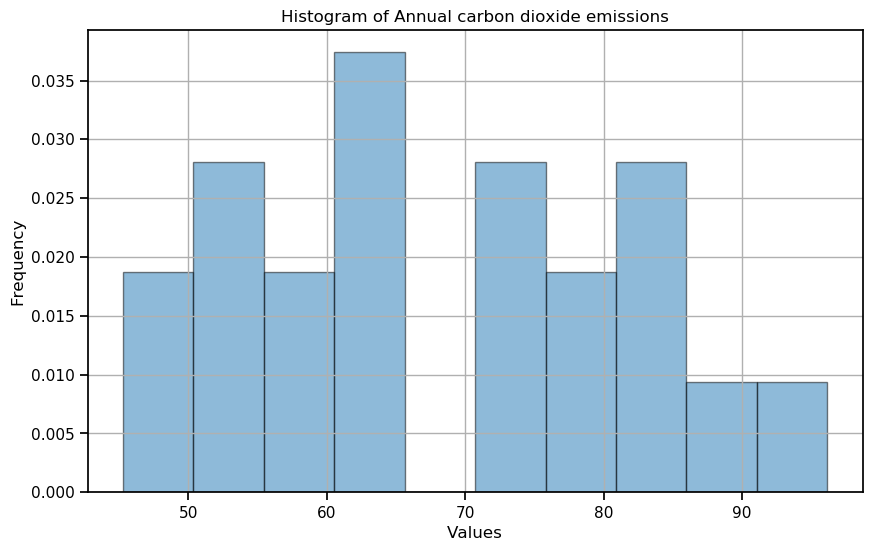

In [13]:

data = Annual_carbon_dioxide_emissions_values
print(data)
# Plotting the histogram
plt.figure(figsize=(10, 6))

plt.hist(data, bins=10,edgecolor='black', density=True, alpha=0.5, label='Histogram')

plt.title('Histogram of Annual carbon dioxide emissions')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

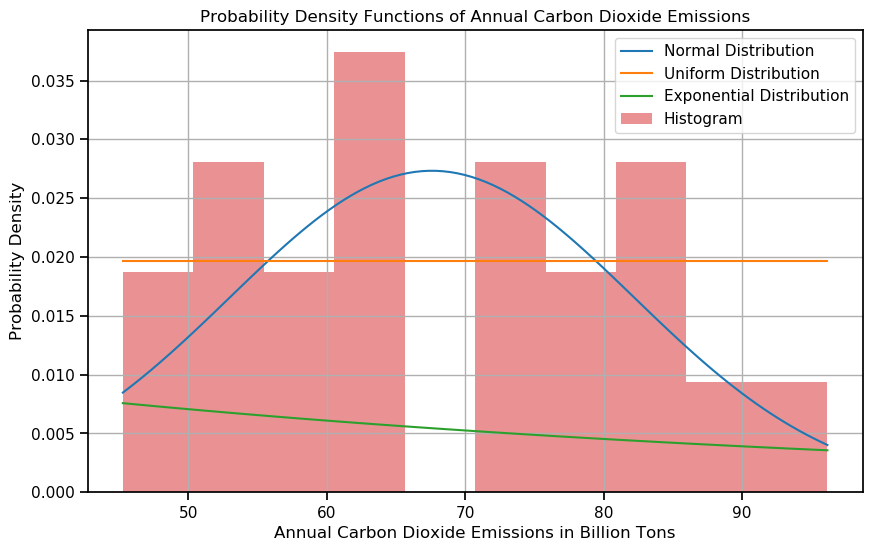

In [12]:
# Historical values

historical_values = Annual_carbon_dioxide_emissions_values

# Generate data for the normal distribution curve
x = np.linspace(min(historical_values), max(historical_values), 100)
y = norm.pdf(x, Annual_carbon_dioxide_emissions_mean, Annual_carbon_dioxide_emissions_std)
y1=gamma.pdf(x, a=Annual_carbon_dioxide_emissions_alpha_mom, scale=Annual_carbon_dioxide_emissions_beta_mom)
y2 = uniform.pdf(x,loc=min(historical_values), scale=max(historical_values)-min(historical_values))
y3 = expon.pdf(x, scale=Annual_carbon_dioxide_emissions_mean)
# Plotting
plt.figure(figsize=(10, 6))
plt.plot(x, y, label='Normal Distribution')
# plt.plot(x, y1, label='Gamma Distribution')
plt.plot(x, y2, label='Uniform Distribution')
plt.plot(x, y3, label='Exponential Distribution')
plt.hist(historical_values, bins=10, density=True, alpha=0.5, label='Histogram')
plt.title('Probability Density Functions of Annual Carbon Dioxide Emissions')
plt.xlabel('Annual Carbon Dioxide Emissions in Billion Tons')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# from pymc3 import Model, Uniform, Normal

# with Model() as wildfire_annual_co2_emission_model_normal:
#     nalpha = Normal('nalpha', mu=Annual_carbon_dioxide_emissions_alpha_mom, sd=10)
#     nbeta = Normal('nbeta', mu=Annual_carbon_dioxide_emissions_alpha_mom, sd=10)

import pymc as pm

wildfire_annual_co2_emission_model_normal = pm.Model()

with wildfire_annual_co2_emission_model_normal:
    nalpha = pm.Normal('nalpha', mu=Annual_carbon_dioxide_emissions_alpha_mom, tau=1.0 / (10.0 ** 2))
    nbeta = pm.Normal('nbeta', mu=Annual_carbon_dioxide_emissions_alpha_mom, tau=1.0 / (10.0 ** 2))


In [ ]:
from pymc import Gamma
with wildfire_annual_co2_emission_model_normal:
    co2_emission_like = Gamma('co2_emission_like', alpha=nalpha, beta=nbeta, observed=Annual_carbon_dioxide_emissions_values)

In [ ]:
from pymc import fit

with wildfire_annual_co2_emission_model_normal: 
    co2_emission_trace_normal = fit(random_seed=RANDOM_SEED).sample(1000)

In [ ]:
from scipy.stats.distributions import gamma

ealpha_posterior_mean = co2_emission_trace_normal['nalpha'].mean()
ebeta_posterior_mean = co2_emission_trace_normal['nbeta'].mean()
print(ealpha_posterior_mean,ebeta_posterior_mean)
Annual_carbon_dioxide_emissions_values.hist(density=True, bins=10)
x=np.linspace(min(Annual_carbon_dioxide_emissions_values), max(Annual_carbon_dioxide_emissions_values), 25)
# x=np.linspace(0, 100)
plt.plot(x, gamma.pdf(x, ealpha_posterior_mean, ebeta_posterior_mean))

In [ ]:
from pymc3 import Model, Exponential

with Model() as wildfire_annual_co2_emission_model_exponential:
    ealpha = Exponential('ealpha', 1/13.)
    ebeta = Exponential('ebeta', 1/13.)

In [ ]:
from pymc3 import Gamma
with wildfire_annual_co2_emission_model_exponential:
    co2_emission_like = Gamma('co2_emission_like', alpha=ealpha, beta=ebeta, observed=Annual_carbon_dioxide_emissions_values)

In [ ]:
from pymc3 import fit

with rainfall_model_exponential: 
    co2_emission_trace_exponential = fit(random_seed=RANDOM_SEED).sample(1000)

In [ ]:
from scipy.stats.distributions import gamma

ealpha_posterior_mean = co2_emission_trace_exponential['ealpha'].mean()
ebeta_posterior_mean = co2_emission_trace_exponential['ebeta'].mean()

Annual_carbon_dioxide_emissions_values.hist(density=True, bins=10)
plt.plot(x, gamma.pdf(x, ealpha_posterior_mean, ebeta_posterior_mean))